## Исследовательский анализ данных (EDA) набора данных медицинского страхования
В этом анализе мы исследуем данные медицинского страхования, чтобы выявить основные закономерности и факторы, влияющие на страховые расходы.

Сначала мы включаем необходимые модули Python.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn.preprocessing import LabelEncoder

Теперь мы можем начать загрузку набора данных в наш код.

In [2]:
data = pd.read_csv("./Exploratory Dataset Analysis/insurance.csv")

Как только файл загружен, мы можем проверить, были ли загружены данные или нет.

In [3]:
print("Количество образцов:", data.shape[0])
print("Количество атрибутов:", data.shape[1])

Количество образцов: 1244
Количество атрибутов: 7


Проверяем некоторые образцы из набора данных, чтобы узнать, как структурирован набор данных и какие атрибуты он содержит

In [4]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Давайте рассмотрим некоторую информацию о наших числовых атрибутах:

In [5]:
data.describe()

,age,bmi,children,charges
count,1244.000000,1244.000000,1244.000000,1244.000000
mean,39.088424,30.582858,1.103698,13198.216342
std,14.055295,6.159513,1.215885,12001.805804
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.060000,0.000000,4733.635288
50%,39.000000,30.210000,1.000000,9382.033000
75%,51.000000,34.618750,2.000000,16579.959053
max,64.000000,53.130000,5.000000,63770.428010


Здесь мы можем увидеть средние значения некоторых атрибутов, среди которых наиболее выделяется атрибут ИМТ, поскольку среднее значение составляет 30, что является начальной точкой ожирения.

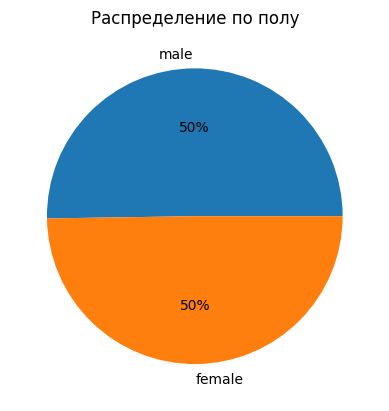

In [6]:
gender_counts = data['sex'].value_counts()
gender_counts.plot(kind='pie', color=['blue', 'pink'], title='Распределение по полу',autopct='%1.0f%%')
plt.ylabel('')
plt.show()

Эта круговая диаграмма показывает, что у нас одинаковое количество образцов обоих полов.

Еще одним атрибутом, который легко проанализировать, является количество образцов на регион:

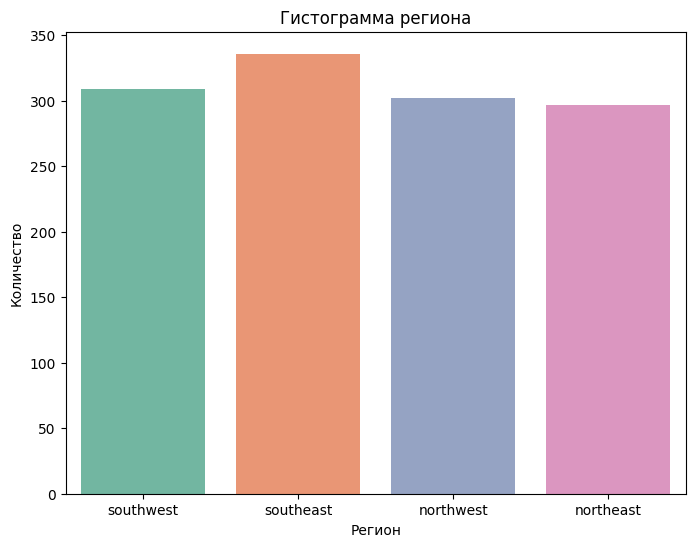

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=data, palette='Set2', hue='region')
plt.title('Гистограмма региона')
plt.ylabel('Количество')
plt.xlabel('Регион')
plt.show()

Количество образцов в каждом регионе практически одинаково, за исключением юго-востока, где образцов немного больше.

Теперь перейдем к очень важному атрибуту — ИМТ.

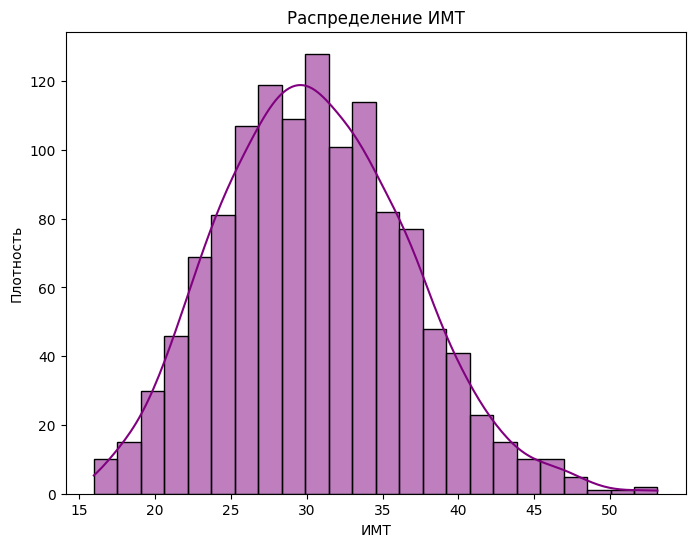

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], kde=True, color='purple')
plt.title('Распределение ИМТ')
plt.xlabel('ИМТ')
plt.ylabel('Плотность')
plt.show(block=False)

Этот атрибут сложно понять только с помощью чисел, давайте попробуем сгруппировать значения, чтобы узнать весовой статус образцов.

Чтобы рассчитать весовой статус, мы рассмотрим следующие группы:

Недостаточный вес: ИМТ менее 18,5.
Нормальный вес: ИМТ от 18,5 до 24,9.
Избыточный вес: ИМТ от 25 до 29,9.
Ожирение: ИМТ 30 или более.

In [9]:
def bmi_status(bmi):
    if bmi < 18.5:
        return 'Недостаточный вес'
    elif 18.5 <= bmi < 25:
        return 'Нормальный вес'
    elif 25 <= bmi < 30:
        return 'Избыточный вес'
    else:
        return 'Ожирение'

data['BMI Status'] = data['bmi'].apply(bmi_status)

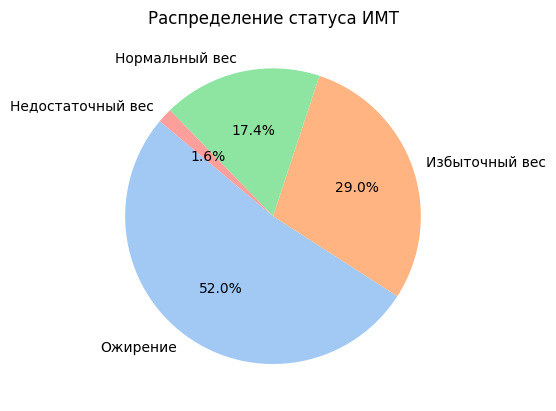

In [10]:
bmi_status_counts = data['BMI Status'].value_counts()
bmi_status_counts.plot(kind='pie', autopct='%1.1f%%', title='Распределение статуса ИМТ', startangle=140, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.show(block=False)

Из предыдущей диаграммы мы видим, что большинство образцов относятся к категории ожирения. Мы также видим, что атрибут ожирения и избыточного веса составляет более трех четвертей набора данных.
Страховые компании рассчитывают сборы в зависимости от влияния и вероятности возникновения различных рисков. Вот почему мы можем ожидать, что статус веса будет важным фактом. Чтобы убедиться в этом, мы рассмотрим взаимосвязь между сборами и этим статусом веса:

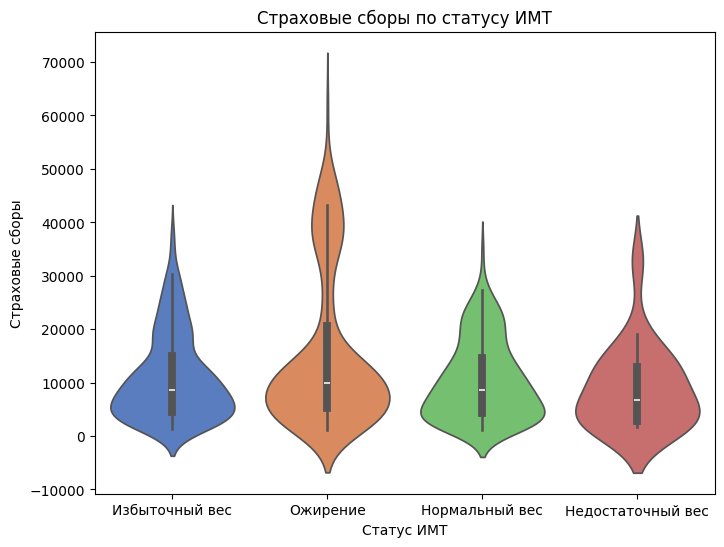

In [11]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='BMI Status', y='charges', data=data, hue='BMI Status', dodge=False, palette='muted', legend=False)
plt.title('Страховые сборы по статусу ИМТ')
plt.ylabel('Страховые сборы')
plt.xlabel('Cтатус ИМТ')
plt.show(block=False)

Как мы и ожидали, весовой статус играет важную роль при расчете сборов. Мы можем ясно видеть тот факт, что чем более нездоров человек, тем выше сборы.

После анализа ИМТ мы можем взглянуть на атрибут возраста. Мы также собираемся сгруппировать возрасты по критерию, показанному ниже:

Молодой: возраст до 29 лет.
Взрослый: возраст от 30 до 59 лет.
Старший: возраст 60 лет и старше.

In [12]:
def age_group(age):
    if age < 30:
        return 'Молодой'
    elif 30 <= age < 60:
        return 'Взрослый'
    else:
        return 'Старший'

data['Age Group'] = data['age'].apply(age_group)

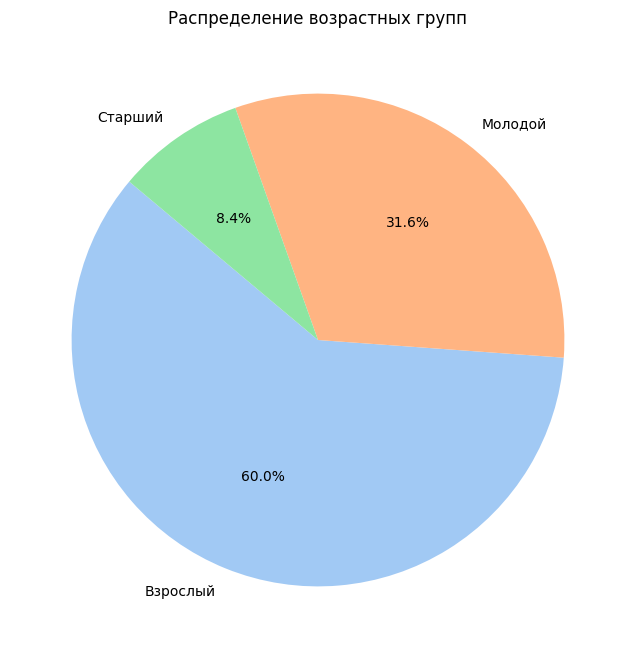

In [13]:
age_group_counts = data['Age Group'].value_counts()

plt.figure(figsize=(8, 8))
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Распределение возрастных групп')
plt.ylabel('')
plt.show()

Теперь пришло время рассмотреть связь между страховыми сборами и возрастными группами:

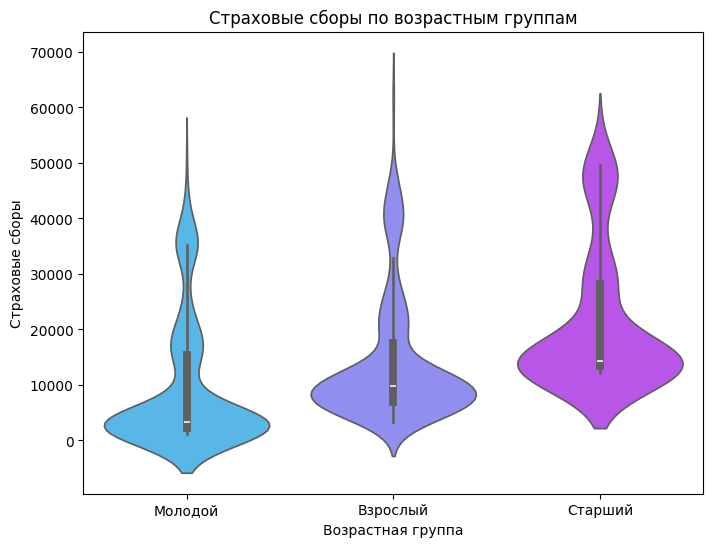

In [14]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Age Group', y='charges', data=data, palette='cool', hue='Age Group')
plt.title('Страховые сборы по возрастным группам')
plt.ylabel('Страховые сборы')
plt.xlabel('Возрастная группа')
plt.show(block=False)

Здесь мы видим, что, хотя возраст и не так важен, как ИМТ, он все равно влияет на страховые взносы.

В наших данных есть еще один атрибут, который представляет собой очень плохую привычку: курение. Как мы уже видели, страховые издержки выше, когда человек ведет нездоровый образ жизни, поэтому мы можем ожидать огромной корреляции между курением и страховыми издержками.

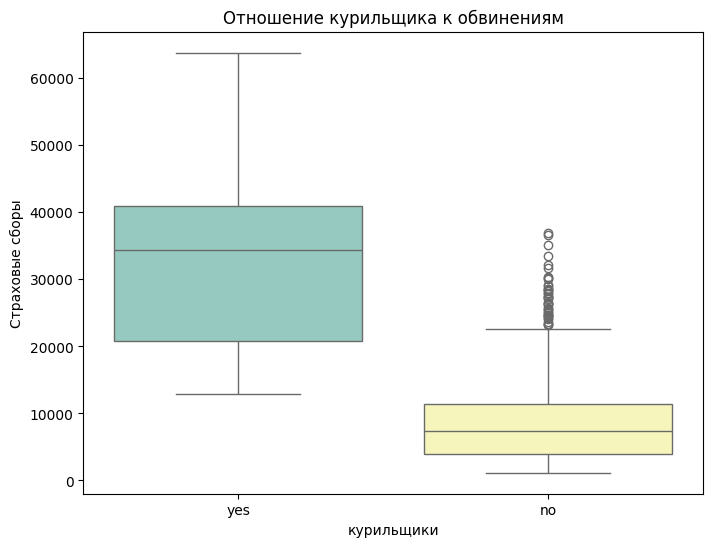

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=data, palette='Set3', hue='smoker')
plt.title('Отношение курильщика к обвинениям')
plt.ylabel('Страховые сборы')
plt.xlabel('курильщики')
plt.show(block=False)

Как мы и ожидали, существует огромная корреляция между страховыми расходами и курительным статусом человека. Можно ясно увидеть, что у курильщиков более высокие страховые расходы.

Давайте проанализируем связь между зарядами и двумя атрибутами, которые представляют уровень здоровья человека.

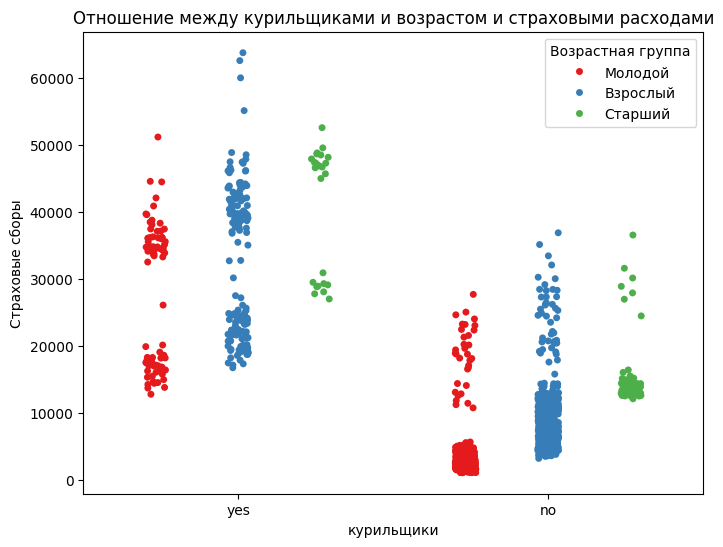

In [16]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='smoker', y='charges', hue='Age Group', data=data, dodge=True, palette='Set1')
plt.title('Отношение между курильщиками и возрастом и страховыми расходами')
plt.ylabel('Страховые сборы')
plt.xlabel('курильщики')
plt.legend(title='Возрастная группа')
plt.show(block=False)

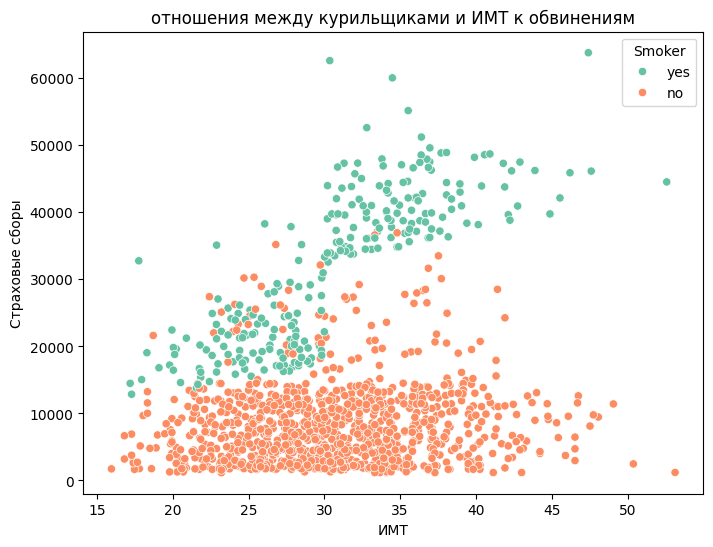

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data, palette='Set2')
plt.title('отношения между курильщиками и ИМТ к обвинениям')
plt.ylabel('Страховые сборы')
plt.xlabel('ИМТ')
plt.legend(title='Smoker')
plt.show(block=False)

Из этого графика мы можем извлечь очень важную информацию:

Существует четкая разница в страховых сборах между курильщиками и некурящими.
Разница в страховых сборах между курильщиками и некурящими значительно увеличивается, когда ИМТ превышает 30, что означает, что человек считается страдающим ожирением, поэтому риск очень высок.

Последний шаг в этом анализе данных — вычисление корреляционной матрицы. Однако перед этим нам необходимо представить все наши атрибуты в численном виде:

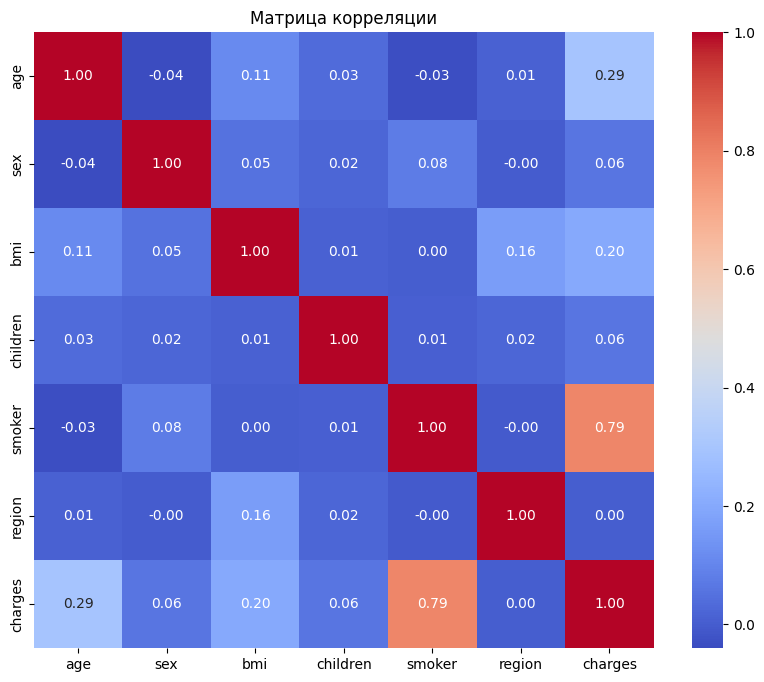

In [18]:
for attribute in ['sex', 'smoker', 'region']:
    label_encoder = LabelEncoder()
    label_encoder.fit(data[attribute])
    data[attribute] = label_encoder.transform(data[attribute])


plt.figure(figsize=(10, 8))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

Если мы посмотрим на корреляции страховых взносов, то ясно увидим, что приемлемую корреляцию имеют только три атрибута:
-Возраст
-ИМТ
-Курильщик